In [1]:
import numpy as np

## sum of squared

$S={1\over 2}\sum_k(y_{pred}-y_{true})^2$

In [2]:
def sse(pred, true):
    result = 0.5 * np.sum(np.square(pred-true))
    return result

In [5]:
aa = np.array([2, 4, 5])
bb = np.array([3, 6, 4])
cc = np.array([[1, 2, 3],
               [4, 5, 6]])
dd = np.array([[2, 3, 2],
               [4, 6, 1]])

print(sse(aa, bb))
print(sse(cc, dd))

3.0
14.5


## Cross Entropy

$CE = -\sum_ky_{true}\log y_{pred}$

In [13]:
def ce(pred, true):
    delta = 1e-7
    result = -np.sum(true * np.log(pred + delta))
    return result

In [45]:
aa2 = np.array([0.5, 0.2, 0.0, 0.3])
bb2 = np.array([0.3, 0.1, 0.1, 0.5])


print(ce(aa2, bb2)) # 정상작동
print(ce(aa, aa))
print(ce(aa, bb))

2.5826836360035736
-14.97866166776995
-16.834959738135577


## Mean Cross Entropy

$MCE={1\over N}\sum_n\sum_kpred_{nk}\log true_{nk}$

In [72]:
def mce(true, pred):
    delta = 1e-7
    
    if pred.ndim == 1:
        pred = pred.reshape(1, pred.size)
        true = true.reshape(1, true.size)
    
    batch_size = pred.shape[0]
    result = -np.sum(true * np.log(pred + delta)) / batch_size
        
    return result

In [73]:
print(mce(aa, bb))
print(mce(aa2, bb2)) # 정상작동
print(mce(aa2, aa2)) # 정상작동
print(mce(cc, dd))

-16.295734518181224
1.2704471482632278
1.0296527140646252
-9.7368945700979


In [78]:
## mnist test
from mnist import load_mnist

(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, one_hot_label=True)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]

In [81]:
print(mce(x_train[:10], x_test[:10]))

883.9427734375


## 수치 미분

${\delta f(x)\over \delta x} = \lim_{h\rightarrow0}{f(x+h)-f(x) \over h}$

In [97]:
# 중앙 차분을 활용한 수치 미분 구현

def diff(f, x):
    h = 1e-4
    result = (f(x+h) - f(x-h)) / 2*h
    return result

### example

$f(x) = 0.01x^2 + 0.1x$

In [101]:
def func1(x):
    return 0.01 * (x**2) + 0.1 * x

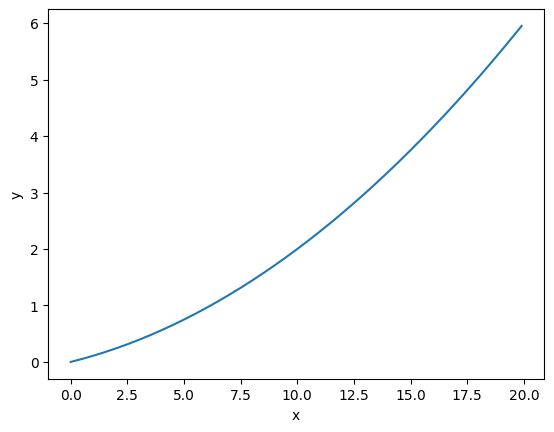

<Figure size 800x800 with 0 Axes>

In [102]:
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = func1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.figure(figsize=(8, 8))
plt.show()

In [103]:
print(diff(func1, 5))
print(diff(func1, 10))

1.9999999999908982e-09
2.999999999986347e-09


## 편미분

$f(x_0, x_1) = x_0^2+x_1^2$

In [104]:
def func2(x):
    return np.sum(x**2)

### example 1
$x_0=3, x_1=4$일 때, ${\delta f\over \delta x_0} =?$

In [110]:
x = np.array([3, 4])

def temp1(x):
    result = x**2 + 4**2
    return result

print(diff(temp1, 3))

6.000000000003781e-08


### example 2

$x_0=3, x_1=4$일 때, ${\delta f\over \delta x_1} =?$

In [113]:
def temp2(x):
    return 3**2 + x**2

print(diff(temp2, 4))

7.999999999999119e-08


## 기울기 계산